# Basic use of the relative feature tightness measure

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [3]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [4]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)

In [5]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [6]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)

In [7]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [8]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [9]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

In [10]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [11]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.051216
         1         2.859507
         10        5.049351
         100       5.464392
         1000      3.330087
...                     ...
939      986      -0.027469
959      995      -0.027469
966      982      -2.612432
968      990      -3.612432
969      995      -0.027469

[2098015 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [12]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [13]:
df_split_coco = np.array_split(coconut_samples, 10)

In [14]:
df_split_coco[2]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
77260,COc1cc2c(c(O)c1C)C(=O)C(O)C(c1ccc(O)cc1)O2,316.094688,2.09212,MGHMBAZWBKOORJ-UHFFFAOYSA-N,MGHMBAZWBKOORJ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[15, 31, 164, 202, 249, 252, 276, 277, 314, 31..."
77261,COc1cc2c(cc1C(C)C)CCC1C3=C(CCC21C)C(=O)OC(C)(C...,384.230060,4.42540,LVERCARRTBWEFF-UHFFFAOYSA-N,LVERCARRTBWEFF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 8, 53, 88, 121, 237, 249, 283, 296, 314, 5..."
77262,CCOC(=O)c1c(CNc2cccc(Cl)c2)n(-c2ccccc2)c2cc(Br...,512.050232,6.84380,NAYDBWIOBZOTTI-UHFFFAOYSA-N,NAYDBWIOBZOTTI,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[45, 54, 58, 80, 85, 87, 145, 147, 165, 191, 2..."
77263,OC1CC(O)C23c4cc5c(cc4CN(CC2O)C3C1)OCO5,305.126323,-0.27260,ZZJABKMPTOPUEL-UHFFFAOYSA-N,ZZJABKMPTOPUEL,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[164, 441, 474, 590, 608, 656, 738, 739, 760, ..."
77264,CC(=O)C=C1OC(C)(C)c2ccc(O)cc21,218.094294,2.58740,HPHLMVQWIOPSME-UHFFFAOYSA-N,HPHLMVQWIOPSME,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[36, 38, 84, 164, 190, 302, 324, 352, 381, 486..."
...,...,...,...,...,...,...,...,...
115885,CNc1nc2ccc3nc(NC)[nH]c3c(C)c-2n1,242.127994,1.84952,GSKRBNQVXCGQRO-UHFFFAOYSA-N,GSKRBNQVXCGQRO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[83, 170, 252, 303, 323, 378, 961, 980, 1025, ..."
115886,COc1cc(C(CC(=O)NCCCC(=O)Nc2cccnc2)c2c(O)cc3c(c...,717.326145,6.05750,NZZVAMHPGZVXEQ-UHFFFAOYSA-N,NZZVAMHPGZVXEQ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 39, 41, 80, 125, 191, 197, 202, 206, 214, ..."
115887,COc1cc2c(cc1O)CC1c3c(cc(OC)c(OC)c3-2)CC[NH+]1C,342.169985,1.75300,ZFLRVRLYWHNAEC-UHFFFAOYSA-O,ZFLRVRLYWHNAEC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[40, 204, 231, 249, 333, 352, 354, 428, 449, 5..."
115888,COc1cc2oc(=O)cc(C)c2cc1CCC(=O)Nc1cc(OC)c(OC)c(...,427.163102,3.70712,GJLFROHJPXCMID-UHFFFAOYSA-N,GJLFROHJPXCMID,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[14, 41, 52, 80, 84, 171, 191, 249, 282, 314, ..."


In [15]:
zinc_samples = pd.read_csv('../data/CP1/ZINC/ZINCrandom.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [16]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[2]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
75804,N#Cc1ccc(-c2ccc(OC[C@H](O)c3ccc(C#N)cc3)cc2)cc1,340.121178,4.20936,OXPDZGMTTDFKHM-QFIPXVFZSA-N,OXPDZGMTTDFKHM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 34, 80, 102, 118, 227, 263, 305, 322, 355,..."
75805,C[C@@]12C=C[C@](C)(O1)[C@@H]1C(=O)N(c3ccc(Cl)c...,303.066221,2.56300,YGXYDYAYCQSPGI-VZAMPYOESA-N,YGXYDYAYCQSPGI,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 133, 216, 233, 314, 561, 650, 656, 787, 81..."
75806,CCOC(=O)C1=C(CN2CCN(C(C)=O)CC2)NC(=O)N[C@H]1c1...,422.176562,1.30000,SWFPPMYEBKSYSG-SFHVURJKSA-N,SWFPPMYEBKSYSG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[74, 80, 101, 145, 147, 216, 294, 301, 314, 32..."
75807,O=S(=O)(Nc1ccc(Cl)cc1Cl)c1ccc(Oc2ccccc2)cc1,392.999320,5.58650,PCYSXDUAGNHPKZ-UHFFFAOYSA-N,PCYSXDUAGNHPKZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[4, 165, 193, 216, 319, 322, 350, 366, 389, 50..."
75808,Cc1ccccc1-c1nc([C@@H](N)C(C)C)n[nH]1,230.153147,2.43592,DJTCDCZTZNLVCQ-NSHDSACASA-N,DJTCDCZTZNLVCQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 26, 74, 283, 352, 378, 615, 715, 739, 786,..."
...,...,...,...,...,...,...,...,...
113700,O=C(CN1CCN(C(=O)CN2N=C(c3nc(-c4ccc5c(c4)OCO5)n...,537.233582,0.94850,UVZBXTXIQDRWEB-UHFFFAOYSA-N,UVZBXTXIQDRWEB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 74, 80, 160, 226, 248, 273, 277, 314, 369,..."
113701,NS(=O)(=O)c1ccc(C(=O)N2CC[C@@H](O)[C@@]3(CCCNC...,367.120192,-0.56280,VTEKDWHHRVLLIP-CZUORRHYSA-N,VTEKDWHHRVLLIP,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[4, 113, 180, 305, 314, 319, 350, 497, 562, 60..."
113702,CCN1CCN(c2ccc(S(=O)(=O)N3CCOCC3)cc2NC(=O)[C@@H...,520.215569,2.39450,RNTHSDBHBBCADW-LJQANCHMSA-N,RNTHSDBHBBCADW,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 34, 35, 74, 80, 90, 199, 231, 283, 294, 31..."
113703,CCOC(=O)C1=C(C)N=c2s/c(=C\c3ccc(OCc4c(F)cccc4C...,606.139149,5.56850,HOJNCUBZFZBIMF-PKYOQBLNSA-N,HOJNCUBZFZBIMF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 80, 94, 125, 145, 147, 162, 237, 246, 281..."


In [17]:
joint_samples = pd.concat((df_split_coco[2], df_split_zinc[2]), ignore_index=True)

In [18]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_21715/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [19]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,RFT
0,COc1cc2c(c(O)c1C)C(=O)C(O)C(c1ccc(O)cc1)O2,316.094688,2.09212,MGHMBAZWBKOORJ-UHFFFAOYSA-N,MGHMBAZWBKOORJ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(15, 31, 164, 202, 249, 252, 276, 277, 314, 31...",1.955799
1,COc1cc2c(cc1C(C)C)CCC1C3=C(CCC21C)C(=O)OC(C)(C...,384.230060,4.42540,LVERCARRTBWEFF-UHFFFAOYSA-N,LVERCARRTBWEFF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 8, 53, 88, 121, 237, 249, 283, 296, 314, 5...",1.527770
2,CCOC(=O)c1c(CNc2cccc(Cl)c2)n(-c2ccccc2)c2cc(Br...,512.050232,6.84380,NAYDBWIOBZOTTI-UHFFFAOYSA-N,NAYDBWIOBZOTTI,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(45, 54, 58, 80, 85, 87, 145, 147, 165, 191, 2...",-0.701447
3,OC1CC(O)C23c4cc5c(cc4CN(CC2O)C3C1)OCO5,305.126323,-0.27260,ZZJABKMPTOPUEL-UHFFFAOYSA-N,ZZJABKMPTOPUEL,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(164, 441, 474, 590, 608, 656, 738, 739, 760, ...",1.367247
4,CC(=O)C=C1OC(C)(C)c2ccc(O)cc21,218.094294,2.58740,HPHLMVQWIOPSME-UHFFFAOYSA-N,HPHLMVQWIOPSME,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(36, 38, 84, 164, 190, 302, 324, 352, 381, 486...",1.927890
...,...,...,...,...,...,...,...,...,...
76526,O=C(CN1CCN(C(=O)CN2N=C(c3nc(-c4ccc5c(c4)OCO5)n...,537.233582,0.94850,UVZBXTXIQDRWEB-UHFFFAOYSA-N,UVZBXTXIQDRWEB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(2, 74, 80, 160, 226, 248, 273, 277, 314, 369,...",-0.348946
76527,NS(=O)(=O)c1ccc(C(=O)N2CC[C@@H](O)[C@@]3(CCCNC...,367.120192,-0.56280,VTEKDWHHRVLLIP-CZUORRHYSA-N,VTEKDWHHRVLLIP,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(4, 113, 180, 305, 314, 319, 350, 497, 562, 60...",-0.331015
76528,CCN1CCN(c2ccc(S(=O)(=O)N3CCOCC3)cc2NC(=O)[C@@H...,520.215569,2.39450,RNTHSDBHBBCADW-LJQANCHMSA-N,RNTHSDBHBBCADW,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 34, 35, 74, 80, 90, 199, 231, 283, 294, 31...",-1.669701
76529,CCOC(=O)C1=C(C)N=c2s/c(=C\c3ccc(OCc4c(F)cccc4C...,606.139149,5.56850,HOJNCUBZFZBIMF-PKYOQBLNSA-N,HOJNCUBZFZBIMF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(25, 80, 94, 125, 145, 147, 162, 237, 246, 281...",-1.607562


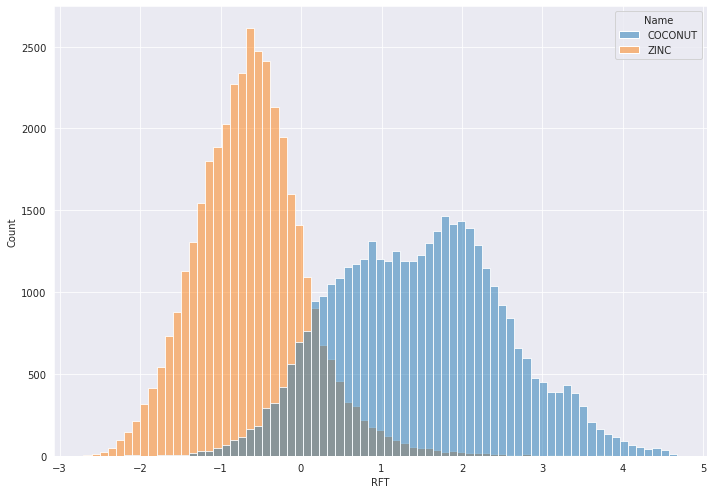

In [20]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.savefig(f"../images//joint_samples_RFT2.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.